In [228]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


import re

from io import StringIO

import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [229]:
import pandas as pd
resumes = pd.read_csv("UpdatedResumeDataSet.csv")

resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [230]:
print("Number of nulls:", resumes.isnull().values.sum())

Number of nulls: 0


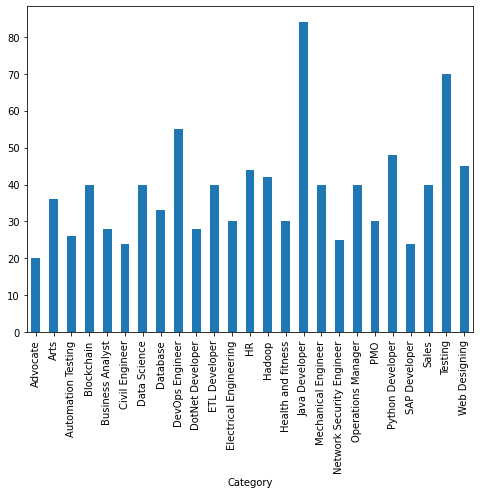

In [231]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
resumes.groupby("Category").Resume.count().plot.bar(ylim=0)
plt.show()

In [232]:
#Deal with the erroneous values in the dataset
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text = re.sub(r"http\S+", "",text)
    html=re.compile(r'<.*?>')
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'')
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

# resumes[1] = resumes[1].replace('[^a-zA-Z0-9 ]', ' ', regex=True)
# resumes[1] = resumes[1].replace("â¢", '')

resumes['Resume'] = resumes['Resume'].apply(lambda x: clean(x))
resumes.head()

,Category,Resume
0,Data Science,"skill programming language python pandas, nump..."
1,Data Science,education detail may may uit rgpv data scienti...
2,Data Science,"area interest deep learning, control system de..."
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,"education detail mca ymcaust, faridabad, harya..."


In [233]:
# resumes[1]
resumes.to_csv("resume_clean.csv", index=False)

In [234]:
#Association rule mining of resume

In [235]:
skills = [['node.js', 'react.js', 'Javascript'],
           ['Javascript', 'Python', 'Java'],
           ['C++', 'Java', 'Python', 'C'],
           ['react.js', 'node.js', 'Python']]
print(skills)

[['node.js', 'react.js', 'Javascript'], ['Javascript', 'Python', 'Java'], ['C++', 'Java', 'Python', 'C'], ['react.js', 'node.js', 'Python']]


In [236]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
skills_array = te.fit(skills).transform(skills)
skills_array

array([[False, False, False,  True, False,  True,  True],
       [False, False,  True,  True,  True, False, False],
       [ True,  True,  True, False,  True, False, False],
       [False, False, False, False,  True,  True,  True]])

In [237]:
import pandas as pd
skills_df = pd.DataFrame(skills_array, columns = te.columns_)
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   C           4 non-null      bool 
 1   C++         4 non-null      bool 
 2   Java        4 non-null      bool 
 3   Javascript  4 non-null      bool 
 4   Python      4 non-null      bool 
 5   node.js     4 non-null      bool 
 6   react.js    4 non-null      bool 
dtypes: bool(7)
memory usage: 156.0 bytes


In [238]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(skills_df, min_support=0.4, use_colnames=True)
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets[frequent_itemsets['length'] == 2].count()
frequent_itemsets

,support,itemsets
0,0.50,(Java)
1,0.50,(Javascript)
2,0.75,(Python)
3,0.50,(node.js)
4,0.50,(react.js)
5,0.50,"(Java, Python)"
6,0.50,"(react.js, node.js)"


In [239]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Java),(Python),0.5,0.75,0.5,1.0,1.333333,0.125,inf
1,(react.js),(node.js),0.5,0.50,0.5,1.0,2.000000,0.250,inf
2,(node.js),(react.js),0.5,0.50,0.5,1.0,2.000000,0.250,inf


In [240]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
newcols = pd.DataFrame(ohe.fit_transform(skills_df).toarray())
newcols.columns = ["Skills" + str(x) for x in newcols.columns]
ohe_col1 = newcols
ohe_col1
newcols

,Skills0,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8,Skills9,Skills10,Skills11,Skills12,Skills13
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [241]:
df = resumes
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df.head()

,Category,Resume,category_id
0,Data Science,"skill programming language python pandas, nump...",0
1,Data Science,education detail may may uit rgpv data scienti...,0
2,Data Science,"area interest deep learning, control system de...",0
3,Data Science,skill r python sap hana tableau sap hana sql s...,0
4,Data Science,"education detail mca ymcaust, faridabad, harya...",0


#TF-IDF 

In [242]:
#tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Resume).toarray()
labels = df.category_id
features.shape

(962, 25841)

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state=0, test_size=0.3, stratify=df['Category'])
# X_train, X_test , y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state=0, test_size=0.3)


#extract features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

#*Logistic Regression*

In [244]:
#adopted from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression().fit(X_train_tfidf, y_train)

y_pred_test2 = logreg.predict(vectorizer.transform(X_test))
print(accuracy_score(y_test, y_pred_test2))

print('Accuracy of logistic regression on test set: {:.4f}'.format(logreg.score(vectorizer.transform(X_test), y_test)))

0.9896193771626297
Accuracy of logistic regression on test set: 0.9896


In [245]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print("Accuracy: ", (scores.mean()*100.0))  

Cross-Validation Accuracy Scores [0.98518519 1.         0.99259259 0.98507463 0.99253731]
Accuracy:  99.1077943615257


In [246]:
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
# from sklearn.metrics import mean_squared_error
# rms = mean_squared_error(y_test, y_pred_test2, squared=False)
# rms

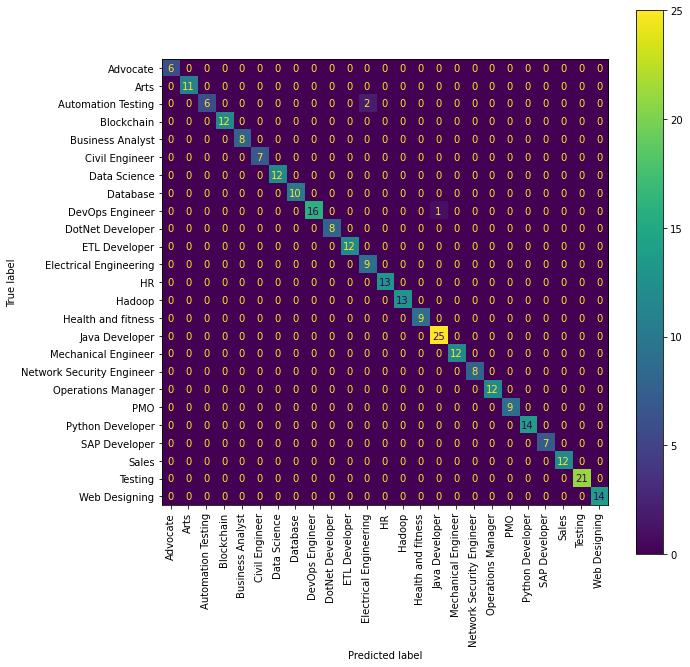

In [247]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, y_pred_test2, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)


disp.plot(ax=ax, xticks_rotation = 'vertical')

#Support Vector Machines

In [248]:
#adopted from https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train_tfidf, y_train)

lin_svm2 = LinearSVC().fit(X_train_tfidf, y_train)
y_pred_test3 = lin_svm2.predict(vectorizer.transform(X_test))

# print('Accuracy of linear SVC on training set: {:.4f}'.format(lin_svm.score(X_train_tfidf, y_train)))
print('Accuracy of linear SVC on test set: {:.4f}'.format(lin_svm.score(vectorizer.transform(X_test), y_test)))

Accuracy of linear SVC on test set: 0.9896


In [249]:
scores = cross_val_score(lin_svm, X_train_tfidf, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print("Accuracy: ", (scores.mean()*100.0))  

Cross-Validation Accuracy Scores [0.99259259 1.         1.         0.99253731 0.99253731]
Accuracy:  99.55334438916529


In [250]:
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
# rms = mean_squared_error(y_test.to_numpy(), y_pred_test3.reshape((len(y_pred_test3),)), squared=False)
# rms

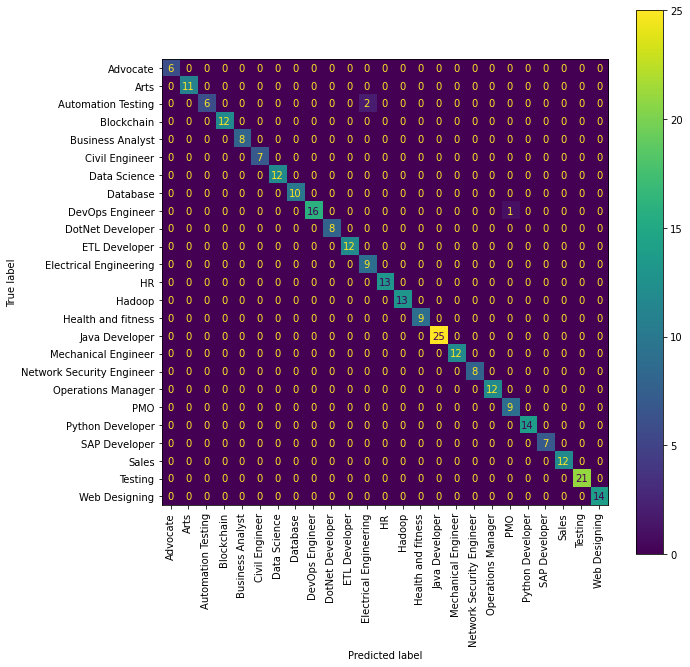

In [251]:
fig, ax = plt.subplots(figsize=(10,10))

predictions = lin_svm.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, predictions, labels=lin_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lin_svm.classes_)


disp.plot(ax=ax, xticks_rotation = 'vertical')


#K-nearest neighbors model

In [252]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train_tfidf, y_train)

y_pred_test4 = knn_clf.predict(vectorizer.transform(X_test))
print(accuracy_score(y_test, y_pred_test4))

print('Accuracy of K-NN model on test set: {:.4f}'.format(knn_clf.score(vectorizer.transform(X_test), y_test)))

0.9653979238754326
Accuracy of K-NN model on test set: 0.9654


In [253]:
scores = cross_val_score(knn_clf, X_train_tfidf, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print("Accuracy: ", (scores.mean()*100.0))  

Cross-Validation Accuracy Scores [0.91851852 0.94814815 0.94814815 0.91791045 0.92537313]
Accuracy:  93.16196793808734


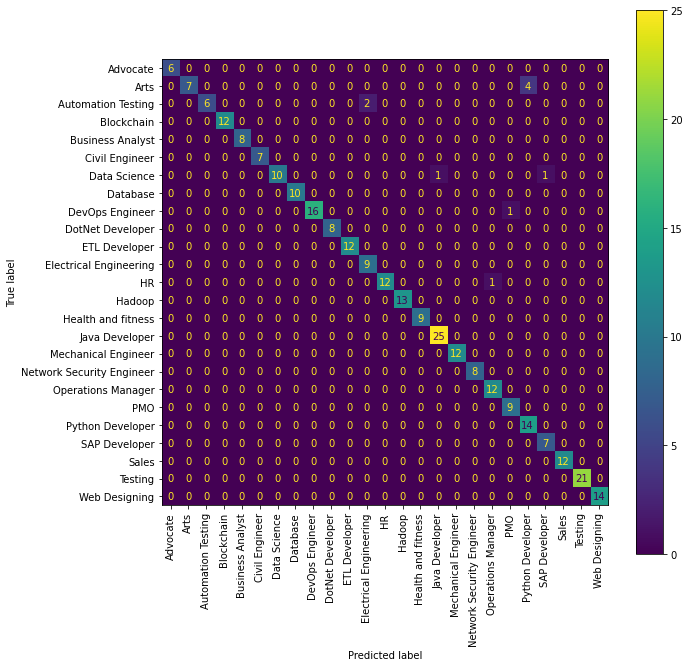

In [254]:
fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, y_pred_test4, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_clf.classes_)


disp.plot(ax=ax, xticks_rotation = 'vertical')

#LSTM for comparison

In [255]:
#adopted from https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [256]:
df2 = resumes
df2.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [257]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df2['Resume'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6766 unique tokens.


In [258]:
from keras_preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['Resume'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (962, 250)


In [259]:
Y = pd.get_dummies(df['Category']).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (962, 25)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [260]:
#Train-test split

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify=Y)


# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(673, 250) (673, 25)
(289, 250) (289, 25)


In [261]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential


lstm_model = Sequential()
lstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(Y_train.shape[1], activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
Total params: 5,082,925
Trainable params: 5,082,925
Non-trainable params: 0
_________________________________________________________________
None


In [217]:
from keras.callbacks import EarlyStopping


epochs = 5
batch_size = 64

history = lstm_model.fit(X_train, Y_train, epochs=epochs, 
                    batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             patience=3, min_delta=0.0001)])

Epoch 1/5
10/10 [==============================] - 12s 877ms/step - loss: 3.2047 - accuracy: 0.1686 - val_loss: 3.1877 - val_accuracy: 0.1618
Epoch 2/5
10/10 [==============================] - 15s 2s/step - loss: 3.1300 - accuracy: 0.2512 - val_loss: 3.2627 - val_accuracy: 0.0882
Epoch 3/5
10/10 [==============================] - 9s 772ms/step - loss: 2.9435 - accuracy: 0.2215 - val_loss: 2.9266 - val_accuracy: 0.1618
Epoch 4/5
10/10 [==============================] - 9s 907ms/step - loss: 2.6178 - accuracy: 0.2727 - val_loss: 2.6413 - val_accuracy: 0.2353
Epoch 5/5
10/10 [==============================] - 9s 826ms/step - loss: 2.2404 - accuracy: 0.4215 - val_loss: 2.2779 - val_accuracy: 0.4853


In [218]:
y_pred_test = lstm_model.predict(X_test)

accr = lstm_model.evaluate(X_test,Y_test)

print('Accuracy of LSTM: {:.4f}'.format(accr[1]))

10/10 [==============================] - 1s 83ms/step - loss: 2.1117 - accuracy: 0.5363
Accuracy of LSTM: 0.5363


In [219]:
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
# rms = mean_squared_error(Y_test.to_numpy(), y_pred_test.reshape((len(y_pred_test),)), squared=False)
# rms

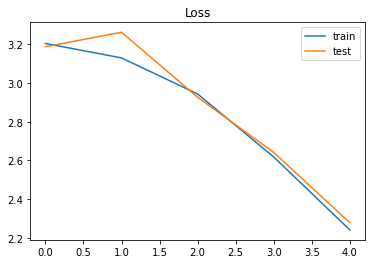

In [220]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

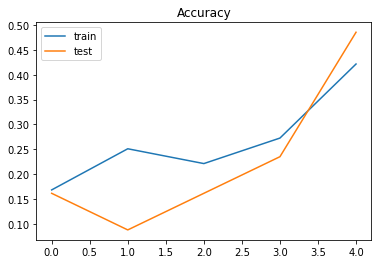

In [221]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [222]:
ex = ['I have 3 years of experience in trading bitcoin, ethereum, and I am a big fan of nft.']
seq = tokenizer.texts_to_sequences(ex)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = lstm_model.predict(padded)
labels = df2.Category.unique()
# labels = ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']
# print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

1/1 [==============================] - 0s 90ms/step
Hadoop


In [223]:
ex2 = ['I am skilled in python, machine learning, data mining, data structure and statistics.']
seq2 = tokenizer.texts_to_sequences(ex2)
padded = pad_sequences(seq2, maxlen=MAX_SEQUENCE_LENGTH)
pred = lstm_model.predict(padded)
labels = df2.Category.unique()
# print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

1/1 [==============================] - 0s 59ms/step
Hadoop


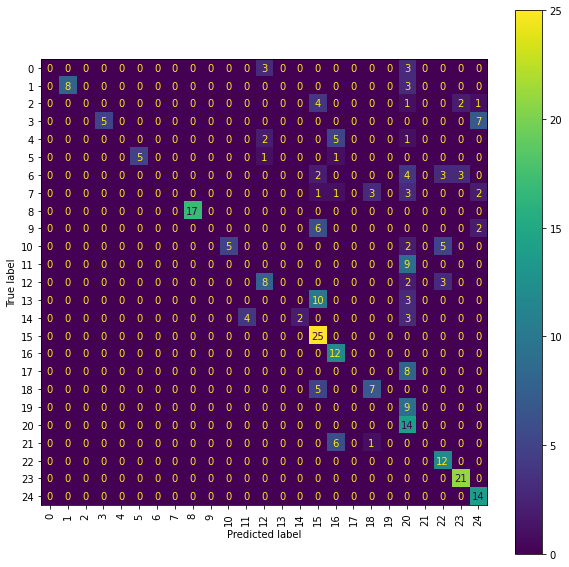

In [224]:
Y_pred = np.argmax(y_pred_test,axis=1)
y_test = np.argmax(Y_test,axis=1)
classes_x=np.argmax(y_pred_test,axis=1)
classes_x
# print(labels[classes_x])
# print(confusion_matrix(y_test_arg, Y_pred))

fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(ax=ax, xticks_rotation = 'vertical')

#LSTM Result

LSTM model is not as accurate compared to Logistic Regression or Support Vector Machines models using TF-IDF to extract features of the resume. The LSTM model only had an accuracy of approximately 44%. LSTM training was also slow compared to the other models.

In [225]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# logreg = LogisticRegression().fit(X_train_tfidf, y_train)

# y_pred_test2 = logreg.predict(vectorizer.transform(X_test))
# print(accuracy_score(y_test, y_pred_test2))

# print('Accuracy of logistic regression on test set: {:.4f}'.format(logreg.score(vectorizer.transform(X_test), y_test)))

In [226]:
# from sklearn.tree import DecisionTreeClassifier
# dt_clf = DecisionTreeClassifier(criterion="entropy")

# dt_clf.fit(X_train, y_train)

# y_pred_test4 = dt_clf.predict(X_test)
# print(accuracy_score(y_test, y_pred_test4))

# print('Accuracy of decision tree on test set: {:.4f}'.format(dt_clf.score(X_test), y_test)) )

In [227]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(100,100))
# from sklearn.tree import plot_tree
# fig = plot_tree(dt_clf)
    
# ), feature_names = df2["Category"].columns)

